In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
from sklearn import decomposition


plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 10})

In [5]:
#Finding the SVD of VORTALL

mat_contents = scipy.io.loadmat(os.path.join('CYLINDER_ALL.mat')) 

vortall = mat_contents['VORTALL']
Uall = mat_contents['UALL']
Vall = mat_contents['VALL']

m, n = *mat_contents['m'], *mat_contents['n']

U, S, VT = np.linalg.svd(vortall, full_matrices=False) 

In [6]:
#fluid flow movie
Z = vortall
pca = decomposition.PCA(n_components = 1)
pca.fit(Z)
Z = pca.transform(Z)

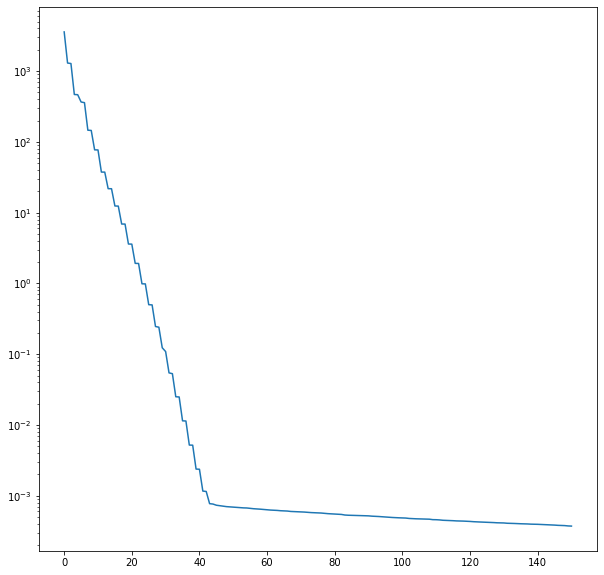

In [7]:
#singular value
plt.semilogy(S)

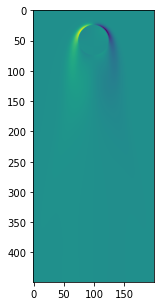

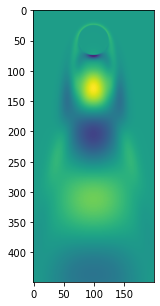

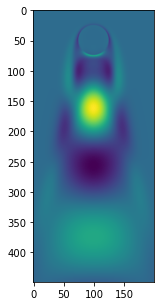

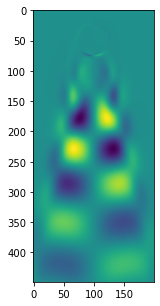

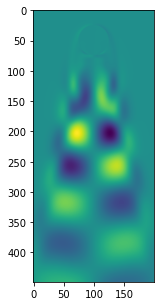

In [8]:
#spectrum
plt.figure(figsize=(10,5))
plt.imshow(U[:,0].reshape(*n,*m))
plt.figure(figsize=(10,5))
plt.imshow(U[:,1].reshape(*n,*m))
plt.figure(figsize=(10,5))
plt.imshow(U[:,2].reshape(*n,*m))
plt.figure(figsize=(10,5))
plt.imshow(U[:,3].reshape(*n,*m))
plt.figure(figsize=(10,5))
plt.imshow(U[:,4].reshape(*n,*m));

When r =  2  there are  [99.81344551]  % captured flow energy with Squared Frobenius norm 15923608.281512177
When r =  3  there are  [99.36082384]  % captured flow energy with Squared Frobenius norm 16724938.730606757
When r =  10  there are  [90.10248117]  % captured flow energy with Squared Frobenius norm 20377179.591820434


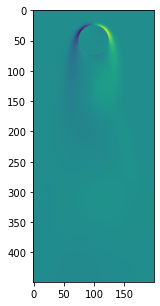

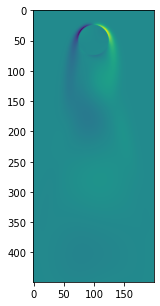

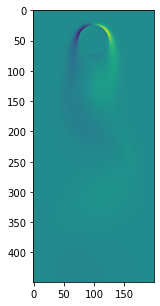

In [9]:
#Write a code to plot for various truncated values
for r in (2,3,10): #predetermined values but can do iteration if necessary


    X = U[:,:r] @ np.diag(S)[:r,:r] @ VT[:r,:r] #Truncation

    pca = decomposition.PCA(n_components = 1) #PCA to compute for fluid flow movie
    pca.fit(X)
    X = pca.transform(X)
    y = pca.explained_variance_ratio_
    err = (np.linalg.norm(Z - X))**2

    print("When r = " , r , " there are " , y*100 , " % captured flow energy with Squared Frobenius norm", err )
    plt.figure(figsize=(10,5))
    plt.imshow(X[:,0].reshape(*n,*m))


In [10]:
#Fix r and compute for truncated SVD

#truncated matrix
r = 10

Xtrunc = U[:,:r] @ np.diag(S)[:r,:r] @ VT[:r,:r]
W = np.diag(S)[:r,:r] @ VT[:r,:r]

In [11]:
#method of snapshot
V_S2_VT = vortall[:,:r].T @ vortall[:,:r]
S2_MoS, V_MoS = np.linalg.eig(V_S2_VT)
S_MoS = np.sqrt(abs(S2_MoS))
U_MoS = vortall[:,:r] @ V_MoS @ np.linalg.inv(np.diag(S_MoS))

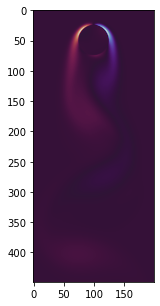

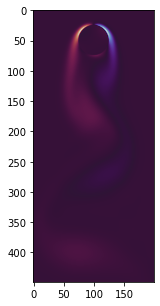

In [12]:
#plot comparison of kth snapshot with Uwk
#k=1
#snapshot
plt.figure(figsize=(10,5))
plt.set_cmap('twilight')
plt.imshow((U_MoS @ np.diag(S_MoS) @ V_MoS)[:,1].reshape(*n,*m))

#Uwk
plt.figure(figsize=(10,5))
plt.set_cmap('twilight')
plt.imshow((U[:,:r]@W[:r,:r])[:,1].reshape(*n,*m))


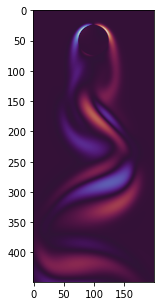

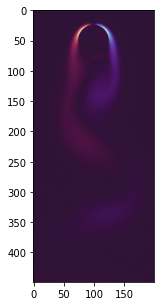

In [13]:
#k=10
#snapshot
plt.figure(figsize=(10,5))
plt.set_cmap('twilight')
plt.imshow((U_MoS @ np.diag(S_MoS) @ V_MoS)[:,9].reshape(*n,*m))

#Uwk
plt.figure(figsize=(10,5))
plt.set_cmap('twilight')
plt.imshow((U[:,:r]@W[:r,:r])[:,9].reshape(*n,*m))

In [14]:
#Build linear regression model

W = (np.diag(S) @ VT)[:,:-1]
Wp = (np.diag(S) @ VT)[:,1:] 

U_w, S_w, VT_w = np.linalg.svd(W, full_matrices=False) 

In [15]:
#pseudoinverse using SVD
Pseu1 = VT_w.T @ np.linalg.inv(np.diag(S_w)) @ U_w.T

In [16]:
#pseudoinverse using np function (for checking purposes)
Pseu2 = np.linalg.pinv(W)

In [17]:
#Compute for A

A = Wp @ Pseu1

Text(0, 0.5, 'Imaginary part')

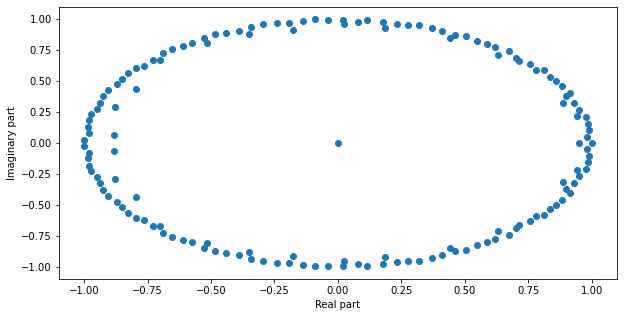

In [18]:
#plot of the eigenvalues

EV, _ = np.linalg.eig(A)


EV_real = [ele.real for ele in EV]

EV_img = [ele.imag for ele in EV]

plt.figure(figsize=(10,5))
plt.scatter(EV_real,EV_img)
plt.xlabel('Real part')
plt.ylabel('Imaginary part')


In [19]:
#Advance the state of w_k

wk = np.array([A**(k)@W[:,0] for k in range(W.shape[1]+1)])

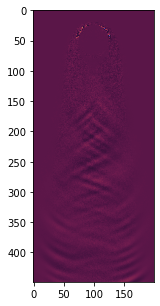

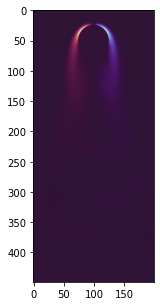

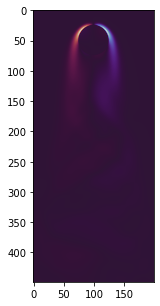

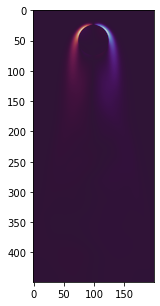

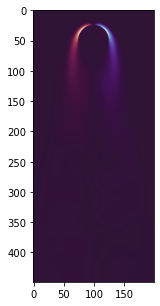

In [20]:
#Plot the reconstructed flow field
#for i in range(W.shape[1]+1):
plt.figure(figsize=(10,5))
plt.imshow((U @ wk[:,0]).reshape(*n,*m))
plt.figure(figsize=(10,5))
plt.imshow((U @ wk[:,3]).reshape(*n,*m))
plt.figure(figsize=(10,5))
plt.imshow((U @ wk[:,5]).reshape(*n,*m))
plt.figure(figsize=(10,5))
plt.imshow((U @ wk[:,7]).reshape(*n,*m))
plt.figure(figsize=(10,5))
plt.imshow((U @ wk[:,10]).reshape(*n,*m))


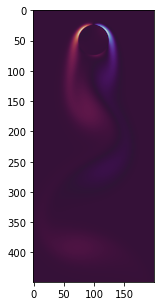

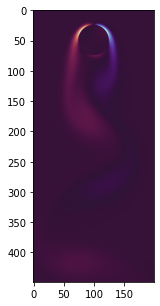

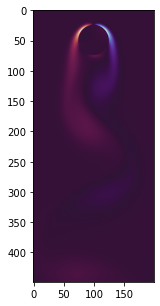

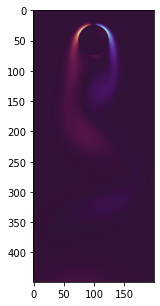

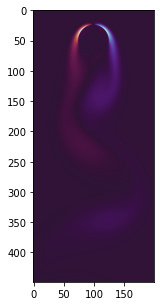

In [21]:
#Compare with true values

plt.figure(figsize=(10,5))
plt.imshow((U @ W[:,0]).reshape(*n,*m))
plt.figure(figsize=(10,5))
plt.imshow((U @ W[:,3]).reshape(*n,*m))
plt.figure(figsize=(10,5))
plt.imshow((U @ W[:,5]).reshape(*n,*m))
plt.figure(figsize=(10,5))
plt.imshow((U @ W[:,7]).reshape(*n,*m))
plt.figure(figsize=(10,5))
plt.imshow((U @ W[:,10]).reshape(*n,*m))